# Laboratorio 3

-  [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB3-IA

## Task 1 - Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

| Método                        | Descripción                                                                 | Ventajas                                                                 | Desventajas                                                                 |
|-------------------------------|---------------------------------------------------------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Descenso de Gradiente         | Minimiza el error de predicción de un modelo donde va recorriendo con la diferencia entre el resultado obtenido y el que se busca obtener | Convergencia precisa y estable.                                           | Puede ser lento para grandes conjuntos de datos.                           |
| Descenso de Gradiente Estocástico | Actualiza los parámetros usando un solo ejemplo en cada iteración. Donde seleciona na observación aleatoria para minimizar la función de pérdida         | Rápido y puede escapar de mínimos locales.                                | Es menos precisa.                                      |
| Descenso de Gradiente por Mini Batches | Actualiza los parámetros usando un pequeño subconjunto de datos en cada iteración. | Balance entre velocidad y precisión, y aprovecha la paralelización.       | Selección del tamaño del mini batch puede ser complicada.                  |

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature
selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin
backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

## Task 2 - Ejercicios Prácticos

### Task 2.1 - Gradiente Descendiente Estocástico

Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini
batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos
solicitados y la distribución real de puntos. Para esto considere que:
* El polinomio que debe usar es 2 * x^3 - 3 * x^2 + 5 * x + 3
* Considere el uso de ```np.polyval```
* Considere el uso de ```np.polyder```
* Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método
fue más rápido y por qué.
* Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De
esto mencione cuál método lo hizo mejor y por qué

### **Importar las librerías a utilizar** 

In [905]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline


### **Generar datos**

In [906]:
np.random.seed(1326)
x = np.linspace(-2, 4, 100)
y_real = 2*x**3 - 3*x**2 + 5*x + 3
y = y_real + np.random.normal(0, 5, 100)

### **Evaluar polinomio y obtener derivada**

In [907]:
polynomial = np.poly1d([2, -3, 5, 3])  # 2x³ - 3x² + 5x + 3
derivative = np.polyder(polynomial)  

### **Calcular el error mediante MSE**

In [908]:

def get_loss(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

### **Gradiente Descendiente**

In [909]:
def gd(x, y, learning_rate=0.00005, iterations=1000):
    coefficients = np.random.randn(4)
    errors = []
    start_time = time.time()
    
    for _ in range(iterations):
        y_pred = np.polyval(coefficients, x)
        grad = np.mean([(y_pred[i] - y[i]) * np.polyval(derivative, x[i]) for i in range(len(x))], axis=0)
        coefficients -= learning_rate * grad
        errors.append(get_loss(y, y_pred))
    
    return coefficients, errors, time.time() - start_time

### **Descenso de Gradiente Estocástico**

In [910]:
# Gradiente Descendente Estocástico (SGD)
def sgd(x, y, learning_rate=0.00005, iterations=1000):
    coefficients = np.random.randn(4)
    errors = []
    start_time = time.time()
    
    for _ in range(iterations):
        idx = np.random.randint(len(x))  # Seleccionar un punto aleatorio
        x_i, y_i = x[idx], y[idx]
        y_pred = np.polyval(coefficients, x_i)
        grad = (y_pred - y_i) * np.polyval(derivative, x_i)
        coefficients -= learning_rate * grad
        errors.append(get_loss(y, np.polyval(coefficients, x)))
    
    return coefficients, errors, time.time() - start_time

### **Mini-Batch Gradiente Descendente**

In [911]:
# Mini-Batch GD
def mini_batch_gd(x, y, batch_size=20, learning_rate=0.00005, iterations=1000):
    coefficients = np.random.randn(4)
    errors = []
    start_time = time.time()
    
    for _ in range(iterations):
        indices = np.random.choice(len(x), batch_size, replace=False)
        x_batch, y_batch = x[indices], y[indices]
        y_pred = np.polyval(coefficients, x_batch)
        grad = np.mean([(y_pred[i] - y_batch[i]) * np.polyval(derivative, x_batch[i]) for i in range(len(x_batch))], axis=0)
        coefficients -= learning_rate * grad
        errors.append(get_loss(y, np.polyval(coefficients, x)))
    
    return coefficients, errors, time.time() - start_time


### **Ejecución de métodos**

In [912]:
coefficients_gd, errors_gd, time_gd = gd(x, y)
coefficients_sgd, errors_sgd, time_sgd = sgd(x, y)
coefficients_mb, errors_mb, time_mb = mini_batch_gd(x, y)

### **Graficar resultados**

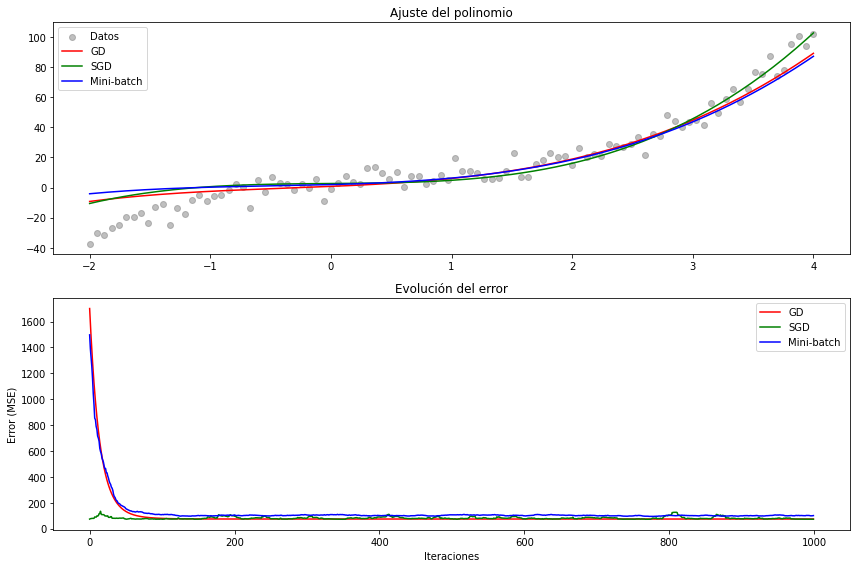

In [913]:
# Graficar resultados
plt.figure(figsize=(12, 8))

# Gráfica de ajuste
plt.subplot(2, 1, 1)
plt.scatter(x, y, color='gray', alpha=0.5, label='Datos')
x_plot = np.linspace(min(x), max(x), 200)
plt.plot(x_plot, np.polyval(coefficients_gd, x_plot), 'r-', label='GD')
plt.plot(x_plot, np.polyval(coefficients_sgd, x_plot), 'g-', label='SGD')
plt.plot(x_plot, np.polyval(coefficients_mb, x_plot), 'b-', label='Mini-batch')
plt.legend()
plt.title('Ajuste del polinomio')

# Gráfica de errores
plt.subplot(2, 1, 2)
plt.plot(errors_gd, 'r-', label='GD')
plt.plot(errors_sgd, 'g-', label='SGD')
plt.plot(errors_mb, 'b-', label='Mini-batch')
plt.xlabel('Iteraciones')
plt.ylabel('Error (MSE)')
plt.legend()
plt.title('Evolución del error')

plt.tight_layout()
plt.show()

### **Mostrar resultados**

In [914]:
print("Tiempos de ejecución:")
print(f"Gradiente Descendente: {time_gd:.4f} segundos")
print(f"SGD: {time_sgd:.4f} segundos")
print(f"Mini-batch GD: {time_mb:.4f} segundos")

print("\nError final (MSE):")
print(f"Gradiente Descendente: {errors_gd[-1]:.4f}")
print(f"SGD: {errors_sgd[-1]:.4f}")
print(f"Mini-batch GD: {errors_mb[-1]:.4f}")

Tiempos de ejecución:
Gradiente Descendente: 1.6013 segundos
SGD: 0.0710 segundos
Mini-batch GD: 0.4160 segundos

Error final (MSE):
Gradiente Descendente: 74.2915
SGD: 72.7207
Mini-batch GD: 100.8240


### **Comparación del tiempo de ejecución**

Como era de esperarse, SGD fue el más rápido, seguido por Mini-Batch GD y finalmente el Gradiente Descendente. Esto se debe a la cantidad de datos y la manera en la que los procesa en cada iteración:

- GD (Gradiente Descendente): Actualiza los coeficientes usando todo el conjunto de datos en cada iteración, lo que es computacionalmente más costoso.
- SGD (Gradiente Descendente Estocástico): Toma solo un punto aleatorio en cada iteración, lo que reduce el tiempo de ejecución.
- Mini-Batch GD: Se encuentra entre ambos métodos, ya que usa pequeños batches o conjunto de datos, lo que lo hace más eficiente que GD pero más costoso que SGD.

### **Comparación del Fitness**

El método con el menor error final (MSE) fue el SGD, lo que indica que produjo el mejor ajuste a los datos en términos de error medio cuadrático. Sin embargo, la diferencia entre GD y SGD no es significativa, lo que indica que ambos métodos convergieron a soluciones bastante similares. Por otro lado, el Mini-Batch GD tuvo el peor desempeño en términos de error, lo que sugiere que el tamaño del batch o el learning rate podrían no ser óptimos para el modelo.

### Task 2.2 - Feature Selection

Tome de nuevo el dataset del laboratorio pasado referente a la clasificación de Partidas de League of Legends.

Sobre este aplique al menos 3 técnicas de feature selection distintas, y con el dataset resultante vuelva a ajustar el modelo de Support Vector Machine (de la librería Sklearn).

Recuerde que:
* Debe definir una métrica de desempeño y justificar el por qué de esta métrica
* Mida el performance de su modelo con las tres técnicas de feature selection y compare cada una de ellas. Es decir, debe tener al menos 4 valores a comparar (el obtenido en el laboratorio pasado, y al menos 3 de las técnicas de feature selection)
* De las medidas obtenidas, diga qué versión lo hizo mejor y por qué.
* Recuerde que para hacer parameter tuning, deben usar las mismas columnas seleccionadas después del
feature selection
* Recuerde que su variable objetivo es “blueWins”

### Task 2.3 - Perceptrón

Implemente un perceptrón de una sola capa para realizar una clasificación binaria del dataset de Iris(incluido en ```sklearn.datasets.load_iris```). Visualice la frontera de decisión que fue aprendida por el perceptrón.
Recuerde que:
* Debe cargar el dataset de Iris desde la librería mencionada
* Use solamente dos features, siendo estos sepal length y sepal width
* Asegúrese de que su clase Perceptron tenga los métodos de fit y predict
* Visualice la frontera de decisión
    * El eje Y debería ser sepal width y el eje X debería ser sepal length
* Debe definir una métrica de desempeño y justificar el por qué de esta métrica. Con dicha métrica, evalúe el rendimiento de su modelo. Es decir, diga si lo hizo bien o no y el por qué.

### **Importación dataset y librerías**

In [915]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### **Carga y prueba de datos**

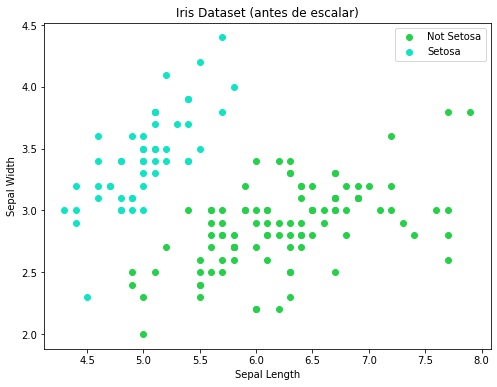

In [916]:
# Dataset Iris
iris = load_iris()

# sepal length y sepal width
X = iris.data[:, [0, 1]]

# Convertir a clasificación binaria: Setosa (1) vs Others (0)
y = (iris.target == 0).astype(int)

# Visualizar los datos sin procesar
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#24d149', label='Not Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#0fe5c4', label='Setosa')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (antes de escalar)')
plt.legend()
plt.show()

### **Escalamiento de datos**

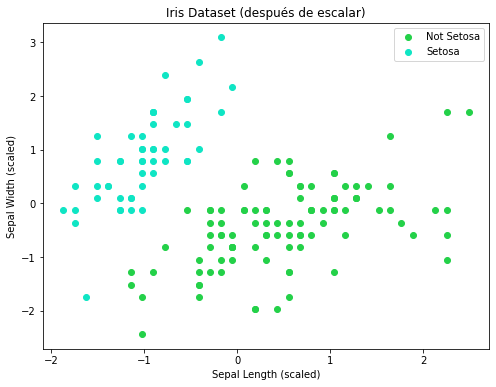

In [917]:
# Escalar los features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualizar los datos escalados
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='#24d149', label='Not Setosa')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='#0fe5c4', label='Setosa')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Iris Dataset (después de escalar)')
plt.legend()
plt.show()

In [918]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Entrenamiento
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = 1 if linear_output >= 0 else 0
                
                # Actualizar 
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

### **División de datos**

In [919]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Forma del conjunto de entrenamiento:", X_train.shape)
print("Forma del conjunto de prueba:", X_test.shape)

Forma del conjunto de entrenamiento: (120, 2)
Forma del conjunto de prueba: (30, 2)


### **Perceptrón | Métrica de desempeño**

In [920]:
# Crear y entrenar el perceptrón
perceptron = Perceptron(learning_rate=0.01, n_iterations=100)
perceptron.fit(X_train, y_train)

# Hacer predicciones
y_pred = perceptron.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



El uso de métrica de desempeño fue accuracy, debido a que es más preciso al tener datos binarios como también cuando las clases se encuentran balanceadas. En este caso el Acurracy fue de 1.00 o bien de 100% lo cuál significa que se clasificaron bien los datos con respecto a las clases Setosa y No-Setosa. 

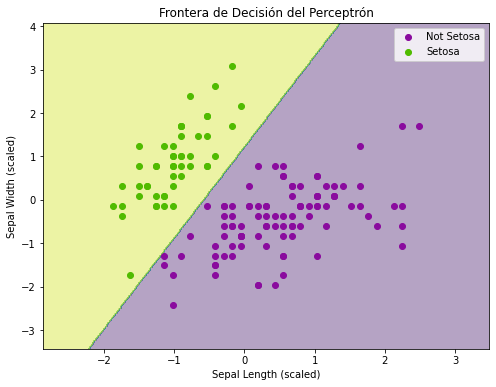

In [921]:
# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicciones en la malla
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafica
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='#8a0b9e', label='Not Setosa')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='#50bb00', label='Setosa')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('Frontera de Decisión del Perceptrón')
plt.legend()
plt.show()

## Referencias 

Mini-batch Gradient Descent. (s/f). Interactivechaos.com. https://interactivechaos.com/es/manual/tutorial-de-deep-learning/mini-batch-gradient-descent

Qué es Descenso de gradiente estocástico (SGD) Concepto y definición. Glosario. (s/f). GAMCO, SL. Recuperado el 9 de febrero de 2025, de https://gamco.es/glosario/descenso-de-gradiente-estocastico-sgd/

¿Qué es el descenso del gradiente? (2024, abril 25). Ibm.com. https://www.ibm.com/mx-es/topics/gradient-descent